# XGBoost

In [1]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [14]:
from notebooks.utils.regression_metrics import regression

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/house_prices.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/house_prices.parquet')

In [5]:
y_train = train.SalePrice
X_train = train.drop(columns=['SalePrice'])

In [6]:
y_validation = validation.SalePrice
X_validation = validation.drop(columns=['SalePrice'])

In [7]:
y_train_scaled = y_train/1000
y_validation_scaled = y_validation/1000

In [8]:
exploratory_depths =[2, 3, 4, 5, 6]
exploratory_estimators = [50, 100, 200, 400, 500]
exploratory_learn_rate = [0.05, 0.1, 0.5, 0.7]

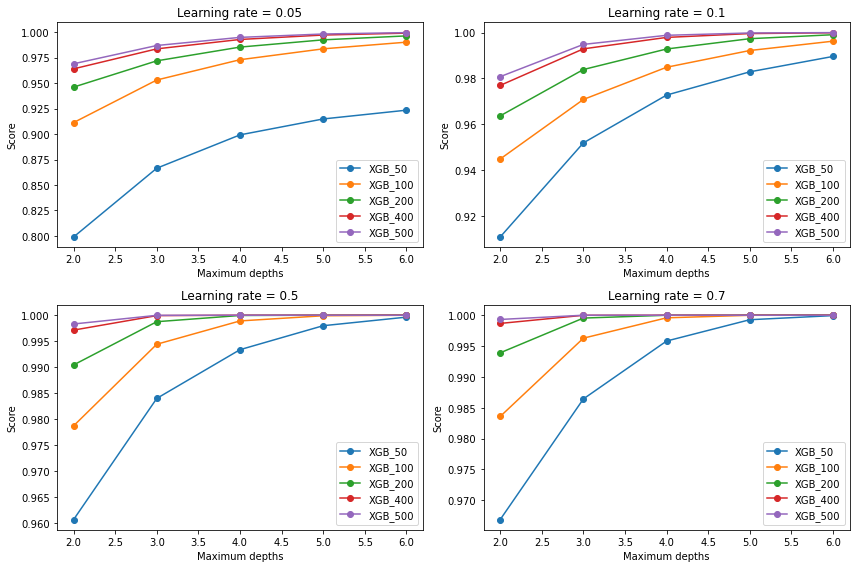

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [37]:
max_depth = [1, 2, 3, 4]
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]
learn_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]

In [38]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(XGBRegressor(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('XGB_'+str(n)+'_'+str(d)+'_'+str(l))

In [39]:
metrics = regression(models_list, names_list, '../../../data/metrics/house_prices/xgboost.csv', X_train, y_train_scaled, X_validation, y_validation_scaled, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_50_1_0.01,0.154586,127.737944,128.045972,0.241141
XGB_50_1_0.05,0.146121,45.713436,50.045559,9.476697
XGB_50_1_0.1,0.145611,33.839267,39.742686,17.445468
XGB_50_1_0.2,0.170545,26.529946,38.113677,43.662848
XGB_50_1_0.5,0.161567,23.974621,37.613636,56.889387
...,...,...,...,...
XGB_400_4_0.05,1.760883,6.697637,32.150180,380.022733
XGB_400_4_0.1,2.325497,3.626671,33.306413,818.374345
XGB_400_4_0.2,1.951884,1.113631,33.601059,2917.251198
XGB_400_4_0.5,2.272027,0.037405,37.753959,100832.319850


In [42]:
metrics.sort_values(by='Validation_RMSE').head(15)

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_50_3_0.5,0.199408,9.991436,30.609165,206.353994
XGB_100_3_0.5,0.382995,5.901822,30.672008,419.704041
XGB_200_3_0.5,0.634193,2.789386,30.758701,1002.705184
XGB_350_3_0.5,1.866099,0.970369,30.770748,3071.036735
XGB_150_3_0.5,0.635339,3.948686,30.777648,679.440320
XGB_300_3_0.5,2.294985,1.373463,30.802629,2142.698696
XGB_400_3_0.5,1.511458,0.688790,30.806536,4372.560415
XGB_250_3_0.5,0.774960,1.948487,30.822089,1481.847676
XGB_400_2_0.2,1.482329,8.473900,31.746715,274.641144
XGB_350_2_0.2,1.153979,9.199039,31.835146,246.070339


In [43]:
metrics[metrics['delta%']<50].sort_values(by='Validation_RMSE').head(15)

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_400_2_0.01,1.110710,26.141624,37.251905,42.500347
XGB_100_1_0.1,0.234879,26.743302,37.946354,41.891058
XGB_50_1_0.2,0.170545,26.529946,38.113677,43.662848
XGB_150_1_0.05,0.329138,29.602658,38.123024,28.782437
XGB_350_2_0.01,1.005856,28.113805,38.137770,35.654957
XGB_200_1_0.05,0.425878,26.760947,38.166045,42.618438
XGB_300_2_0.01,0.761002,30.982647,39.556012,27.671504
XGB_50_1_0.1,0.145611,33.839267,39.742686,17.445468
XGB_100_1_0.05,0.234881,34.026206,39.856946,17.136026
XGB_50_2_0.05,0.175531,35.408334,41.856380,18.210531


We choose **XGB_400_2_0.01**

In [24]:
test =  pd.read_parquet('../../../data/model_input/test_sets/house_prices.parquet')

In [25]:
y_test = test.SalePrice
X_test = test.drop(columns=['SalePrice'])

In [26]:
retrain = pd.concat([train, validation])

In [27]:
y_retrain = retrain.SalePrice
X_retrain = retrain.drop(columns=['SalePrice'])

In [28]:
y_retrain_scaled = y_retrain/1000
y_test_scaled = y_test/1000

In [44]:
model = XGBRegressor(n_estimators=400, max_depth=2, learning_rate=0.01).fit(X_retrain, y_retrain_scaled)

In [45]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test_scaled, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 28.4455


In [46]:
dump(model, 'best_xgboost.joblib')

['best_xgboost.joblib']

In [47]:
with open('../../../data/metrics/house_prices/final_RMSE.txt', 'a') as f:
    f.write('\nXGB, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_4748/3867665254.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],


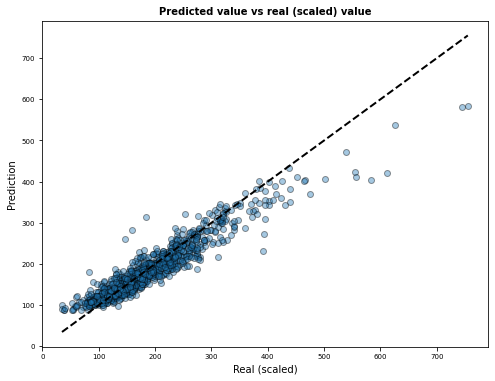

In [48]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain_scaled

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain_scaled, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real (scaled) value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real (scaled)')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)